In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
dane = pd.read_excel('dane.xlsx')

In [4]:
data = pd.to_datetime(dane[['year','month','day']])

In [5]:
dane['data']=data

In [6]:
dane_gotowe_all = dane[['data','company','net','country','opiekun']]

In [7]:
dane_gotowe_all

,data,company,net,country,opiekun
0,2005-12-08,ARKAEXIN,1553.10,SERBIA,MKR Mirosław Kruk
1,2013-10-04,RUDNIK TUMAY,1682.60,Polska,MKR Mirosław Kruk
2,2013-10-07,MB-INC,11843.90,MACEDONIA,MBI Marcin Biszczak
3,2013-10-07,REXXER,1071.60,Polska,MKR Mirosław Kruk
4,2013-10-08,Sharks Slovakia,3707.87,Słowacja,MKR Mirosław Kruk
...,...,...,...,...,...
17837,2022-09-15,Trans-Chem,830.00,Polska,MBI Marcin Biszczak
17838,2022-09-15,Trans-Chem,830.00,Polska,MBI Marcin Biszczak
17839,2022-09-15,Tomasz Sito,228.72,Polska,AWY Aneta Wyrzykowska
17840,2022-09-15,Handva Global S.L.,22580.54,Hiszpania,MKR Mirosław Kruk


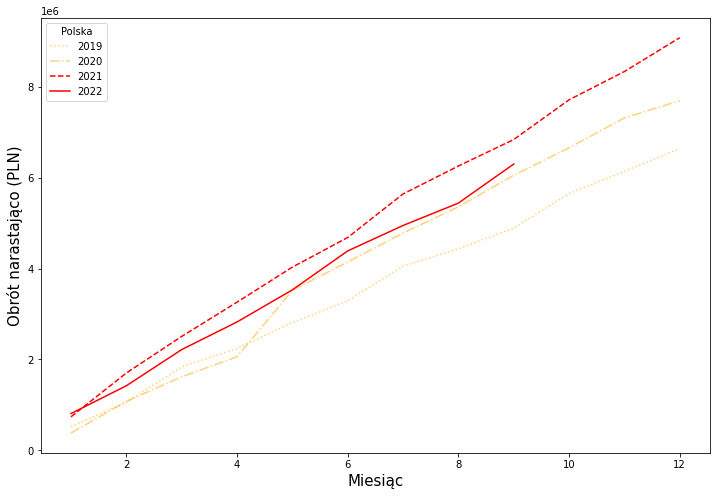

In [18]:
#countries = ['Polska','Niemcy', 'Łotwa', 'Włochy', 'Francja', 'Litwa', 'Rumunia', 'Węgry', 'Hiszpania', 'Bułgaria', 'Grecja']

countries = ['Polska']

for country in countries:
    #dane_gotowe = dane_gotowe_all[dane_gotowe_all['opiekun']=='MBI Marcin Biszczak']
    #dane_gotowe = dane_gotowe_all[dane_gotowe_all['opiekun']=='MKR Mirosław Kruk']
    #dane_gotowe = dane_gotowe_all[dane_gotowe_all['opiekun']=='AWY Aneta Wyrzykowska']
    dane_gotowe = dane_gotowe_all
    
    Polska2021= dane_gotowe[(dane_gotowe['data']> '2021-01-01') & (dane_gotowe['data']<= '2021-12-31')]
    Polska2021= Polska2021.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Polska2021 = Polska2021.cumsum()
    Polska2021['no'] = [a for a in range(1,len(Polska2021)+1)]
    Polska2021=Polska2021.set_index('no')

    Polska2020= dane_gotowe[(dane_gotowe['data']> '2020-01-01') & (dane_gotowe['data']<= '2020-12-31')]
    Polska2020= Polska2020.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Polska2020 = Polska2020.cumsum()
    Polska2020['no'] = [a for a in range(1,len(Polska2020)+1)]
    Polska2020=Polska2020.set_index('no')

    Polska2022= dane_gotowe[(dane_gotowe['data']> '2022-01-01') & (dane_gotowe['data']<= '2022-12-31')]
    Polska2022= Polska2022.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Polska2022 = Polska2022.cumsum()
    Polska2022['no'] = [a for a in range(1,len(Polska2022)+1)]
    Polska2022=Polska2022.set_index('no')

    Polska2019= dane_gotowe[(dane_gotowe['data']> '2019-01-01') & (dane_gotowe['data']<= '2019-12-31')]
    Polska2019= Polska2019.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Polska2019 = Polska2019.cumsum()
    Polska2019['no'] = [a for a in range(1,len(Polska2019)+1)]
    Polska2019=Polska2019.set_index('no')

    ax = plt.figure(figsize=(12,8)).add_subplot(1,1,1)
    ax.plot(Polska2019, ':',color= 'orange', alpha = 0.5)
    ax.plot(Polska2020,'-.', color= 'orange', alpha = 0.5)
    ax.plot(Polska2021, '--', color = 'red')
    ax.plot(Polska2022, color = 'red')
    ax.set_xlabel('Miesiąc', size = 15)
    ax.set_ylabel("Obrót narastająco (PLN)", size = 15)
    ax.legend(['2019','2020','2021','2022'], title = country)
    #plt.savefig(country+'.jpg', dpi = 400)

In [9]:
years =[2014,2015,2016,2017,2018,2019,2020,2021,2022]
dict_by_years ={}

for a in years:
    dane = dane_gotowe_all[(dane_gotowe_all['data']>str(a)) & (dane_gotowe_all['data']<str(a+1))]
    dane = dane.groupby(['country']).sum()
    dane['no'] = [a for a in range(len(dane))]
    dict_by_years[a] = dane
    
dane_merged = 0
for enum,a in enumerate(dict_by_years.keys()):
    if enum == 0:
        dane_merged =dict_by_years[a] 
    else:
        dane_merged = dane_merged.merge(dict_by_years[a], on = 'country', suffixes =(None,a))
    

In [10]:
dane_merged_do_wykresu= dane_merged[['net','net2015','net2016','net2017','net2018','net2019','net2020','net2021','net2022']].sort_values(by='net2021',ascending = False)


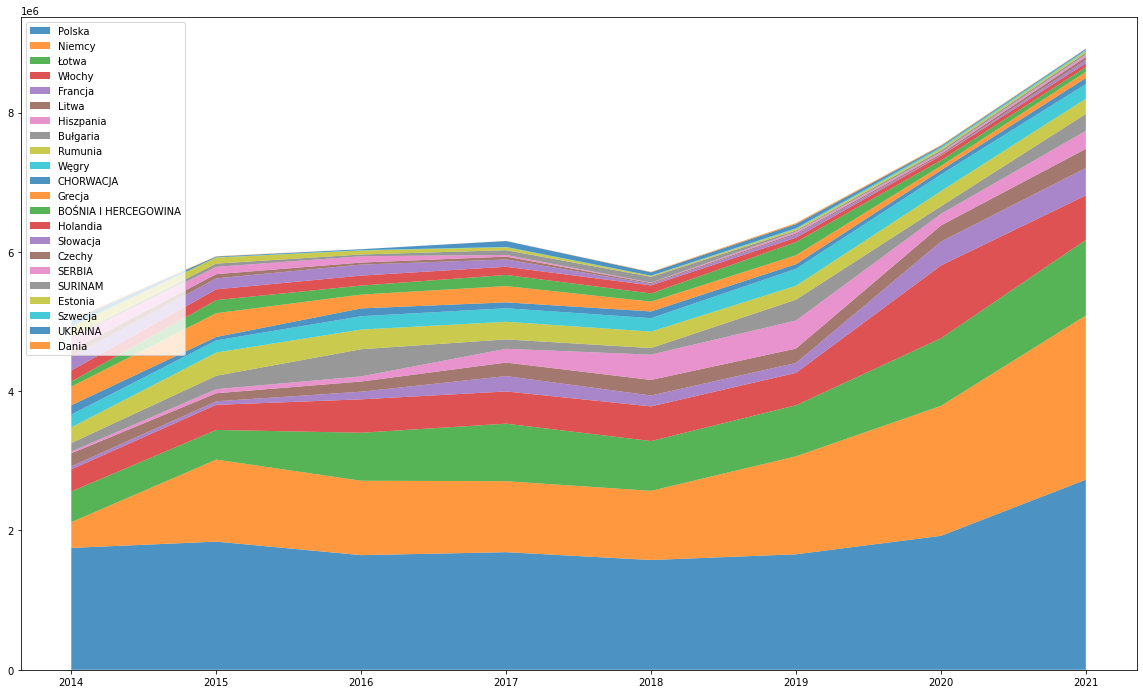

In [11]:
dane_merged_do_wykresu= dane_merged[['net','net2015','net2016','net2017','net2018','net2019','net2020','net2021']].sort_values(by='net2021',ascending = False)
years =[2014,2015,2016,2017,2018,2019,2020,2021]
#fig, ax = plt.subplots()
ax = plt.figure(figsize=(20,12)).add_subplot(1,1,1)
ax.stackplot(years, dane_merged_do_wykresu, labels=dane_merged_do_wykresu.index, alpha=0.8)
ax.legend(dane_merged_do_wykresu.index, loc='upper left')
plt.savefig('Countries_by_years.jpg', dpi = 400)

In [12]:
dane_merged_do_wykresu

,net,net2015,net2016,net2017,net2018,net2019,net2020,net2021
country,,,,,,,,
Polska,1750077.86,1840267.57,1646021.98,1688671.66,1576385.42,1658396.57,1923207.74,2729884.84
Niemcy,369980.20,1177725.00,1068138.02,1019480.98,992822.20,1407003.88,1865428.54,2357073.23
Łotwa,440546.80,425732.89,689210.83,825450.16,714840.64,732412.00,970831.69,1085103.15
Włochy,316930.13,360909.46,479801.41,462569.42,497672.24,465474.89,1045359.77,639055.89
Francja,43984.01,50230.80,109533.59,221009.59,156698.38,142350.50,342854.76,393303.10
Litwa,186792.17,115618.37,146150.47,193852.82,223159.73,206056.49,231640.86,274748.64
Hiszpania,24025.85,58065.62,73878.77,197589.47,362939.82,403109.82,165310.54,258007.52
Bułgaria,123231.06,193066.02,389751.36,135321.65,94946.30,299200.21,109589.65,243911.80
Rumunia,225431.82,333504.34,282181.53,252787.06,236093.10,199899.79,217897.12,218856.97


In [13]:
dane_procentowo = dane_merged_do_wykresu
dane_procentowo/dane_procentowo.sum()

,net,net2015,net2016,net2017,net2018,net2019,net2020,net2021
country,,,,,,,,
Polska,0.347919,0.309945,0.272575,0.274265,0.275932,0.258566,0.255344,0.306054
Niemcy,0.073553,0.198357,0.176880,0.165578,0.173784,0.219371,0.247673,0.264257
Łotwa,0.087581,0.071704,0.114131,0.134065,0.125126,0.114193,0.128897,0.121654
Włochy,0.063006,0.060786,0.079453,0.075128,0.087113,0.072574,0.138792,0.071646
Francja,0.008744,0.008460,0.018138,0.035895,0.027429,0.022194,0.045521,0.044094
Litwa,0.037135,0.019473,0.024202,0.031484,0.039062,0.032127,0.030755,0.030803
Hiszpania,0.004776,0.009780,0.012234,0.032091,0.063529,0.062850,0.021948,0.028926
Bułgaria,0.024499,0.032517,0.064541,0.021978,0.016619,0.046649,0.014550,0.027346
Rumunia,0.044816,0.056170,0.046728,0.041056,0.041326,0.031167,0.028930,0.024537


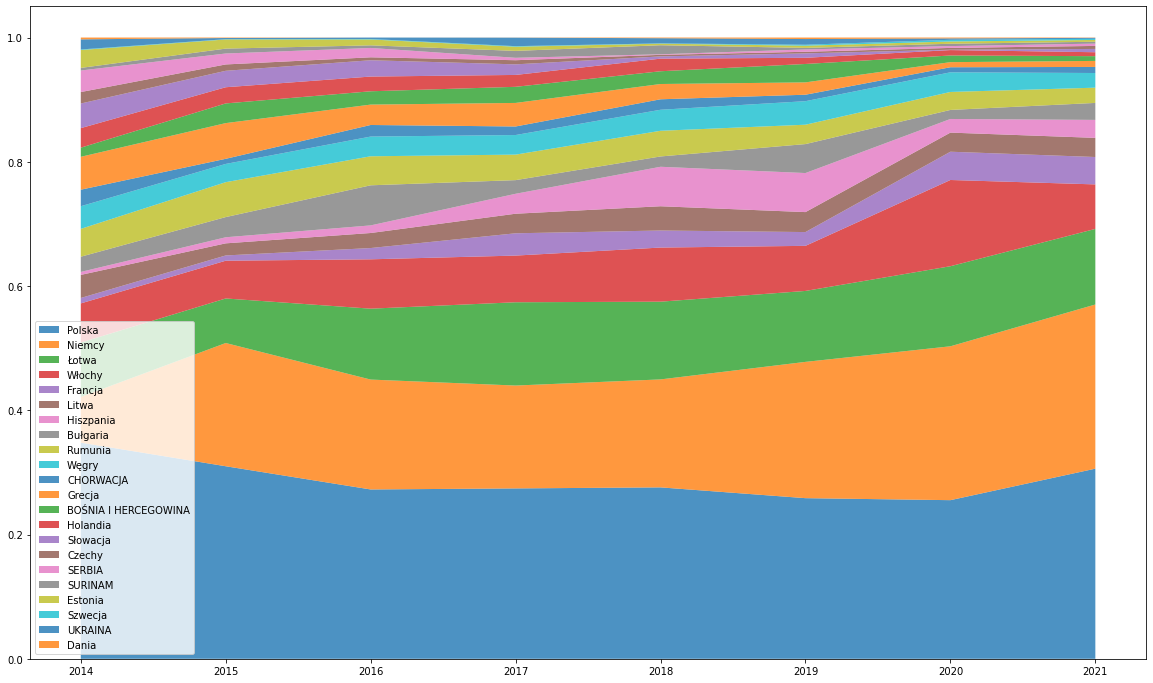

In [14]:
dane_merged_do_wykresu= dane_merged[['net','net2015','net2016','net2017','net2018','net2019','net2020','net2021']].sort_values(by='net2021',ascending = False)
years =[2014,2015,2016,2017,2018,2019,2020,2021]
#fig, ax = plt.subplots()
ax = plt.figure(figsize=(20,12)).add_subplot(1,1,1)
ax.stackplot(years, dane_procentowo/dane_procentowo.sum(), labels=dane_merged_do_wykresu.index, alpha=0.8)
ax.legend(dane_merged_do_wykresu.index, loc='lower left')
plt.savefig('Countries_by_years.jpg', dpi = 400)